# IAM Writer Recognition

This notebook is a part of my thesis which theme is offline writer identification. I've researched multiple papers concerning different models and techniques for identifying a writer of a text based on their writing style. We'll be using IAM database which has aproximately 650 unique writers. [IAM Handwriting Database](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database/download-the-iam-handwriting-database).

First step is to pair each sentence with its respective writer. Crosschecking with ``forms.txt`` file.

In [2]:
# This part creates a dictionary 
# and stores pairs of form ID and writer ID 

import os
from itertools import islice

formWriter = {}
formsFilePath = "../data/forms.txt"
with open(formsFile_Path) as f:
    for line in islice(f, 16, None):
        lineList = line.split(' ')
        formId = lineList[0]
        writer = lineList[1]
        formWriter[formId] = writer

As jupyter notebooks are a visual medium, here's some content of the dictionary "formWriter" displayed. The dictionary contains pairs of form ID and writer ID.

In [3]:
list(formWriter.items())[0:5]

[('a01-000u', '000'),
 ('a01-000x', '001'),
 ('a01-003', '002'),
 ('a01-003u', '000'),
 ('a01-003x', '003')]

As computing power is limited even with 16gb ram and 4 core virtual machine, I will filter from the whole dataset the 50 most active writers out of 221 in this dataset.

In [4]:
# Selection of writers with most content. In this case top 50 writers.

from collections import Counter

topWriters = []
numWriters = 50
writersCounter = Counter(formWriter.values())
for writerId,_ in writersCounter.most_common(numWriters):
    topWriters.append(writerId)

Check if the topWriters array got filled with correct writer IDs

In [5]:
print(topWriters[0:5])

['000', '150', '151', '152', '153']


Filter the dataset so that only the sentence IDs that correspond to the "topWriters" array writer IDs are left.

In [6]:
topForms = []
for formId, authorId in formWriter.items():
    if authorId in topWriters:
        topForms.append(formId)

Here are couple of the sentence IDs after filtering:

In [7]:
print(topForms[0:5])

['a01-000u', 'a01-003u', 'a01-007u', 'a01-011u', 'a01-014u']


Now we have a "topForms" array that has listed every sentence ID we need for this project. We need a new container for the new list of sentences for easier handling later on. Let's create one!

In [8]:
import os
import glob
import shutil

# Temporal directory for top sentences
# NOTE: This snippet assumes it's been executed already if the "temp_sentences" folder exists
# If for some reason you want to run the "copyfile" half of this snippet, remove that folder.
tempSentencesPath = "../data/temp_sentences"
if not os.path.exists(tempSentencesPath):
    os.makedirs(tempSentencesPath)
    
    # NOTE: Place the original sentences folder according to the path here
    # Copies files according to "topForms" array
    originalSentencesPath = "../data/sentences/**/**/*.png"
    for filePath in glob.glob(originalSentencesPath):
        imageName = filePath.split('/')[-1]  
        fileName, _ = os.path.splitext(imageName)
        formId = '-'.join(fileName.split('-')[0:2])
        if formId in topForms:
            shutil.copy2(filePath, tempSentencesPath + "/" + imageName)

Create "imgFiles" array of the temp folder sentence files and another "imgTargets" array for holding the top 50 writer IDs.

In [9]:
import numpy as np

imgFiles = np.zeros((0), dtype=np.str)
imgTargets = np.zeros((0), dtype=np.str)
pathToFiles = os.path.join(tempSentencesPath, '*')
for filePath in glob.glob(pathToFiles):
    imgFiles = np.append(imgFiles, filePath)
    fileName, _ = os.path.splitext(filePath.split('/')[-1]  )
    formId = '-'.join(fileName.split('-')[0:2])
    for key in formWriter:
        if key == formId:
            imgTargets = np.append(imgTargets, formWriter[form_id])

Visualize the selected filenames.

In [10]:
print(imgFiles[0:5])

['../data/temp_sentences/g06-026e-s02-00.png'
 '../data/temp_sentences/a01-058u-s00-01.png'
 '../data/temp_sentences/n02-127-s00-01.png'
 '../data/temp_sentences/b06-000-s00-02.png'
 '../data/temp_sentences/m06-083-s03-00.png']


A good time to check how matplotlib works with the copied sentence files.

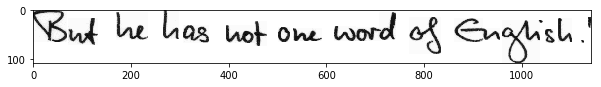

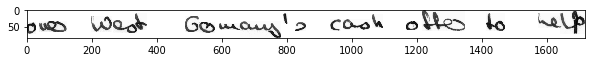

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for fileName in imgFiles[:2]:
    img = mpimg.imread(fileName)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')